In [1]:
from fbprophet import Prophet
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
from fbprophet.plot import plot_cross_validation_metric
import pandas as pd

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


## Read dataset and pre processing

### Read Covid-19 cases


In [2]:
df = pd.read_csv('Datasets/covid_19_cases/COVID-19 Activity.csv')

Este dataset pode ser encontrado em: https://data.world/covid-19-data-resource-hub/covid-19-case-counts

O download do arquivo utilizado neste estudo foi realizado em: 10/06/2020

### Prepare Dataframes

In [3]:
df['REPORT_DATE'] = pd.to_datetime(df['REPORT_DATE'], format='%m/%d/%Y')

In [4]:
df_br = df[df['COUNTRY_ALPHA_2_CODE'] =='BR']

In [5]:
df_br_cases = df_br.loc[:, df_br.columns.intersection([
                                         'REPORT_DATE', 
                                         'PEOPLE_POSITIVE_NEW_CASES_COUNT'])]

In [6]:
df_br_deaths = df_br.loc[:, df_br.columns.intersection([
                                         'REPORT_DATE', 
                                         'PEOPLE_DEATH_NEW_COUNT'])]

In [7]:
df_br_deaths = df_br.rename(columns={'REPORT_DATE':'ds','PEOPLE_DEATH_NEW_COUNT':'y'})

In [8]:
df_br_cases = df_br.rename(columns={'REPORT_DATE':'ds','PEOPLE_POSITIVE_NEW_CASES_COUNT':'y'})

## Predict

### Cases

In [9]:
cases_model = Prophet(daily_seasonality=True)

In [10]:
cases_model.fit(df_br_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [11]:
future_cases = cases_model.make_future_dataframe(periods=180)

In [12]:
forecast_cases = cases_model.predict(future_cases)
forecast_cases[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(180)

,ds,yhat,yhat_lower,yhat_upper
163,2020-06-11,27549.531907,24571.610372,30435.914610
164,2020-06-12,28330.906573,25570.226585,30966.355170
165,2020-06-13,28876.568144,26015.001694,31615.151633
166,2020-06-14,29147.109588,26445.292467,32150.239293
167,2020-06-15,27765.153035,24989.532869,30688.887550
...,...,...,...,...
338,2020-12-03,119123.844932,101120.618512,139084.629161
339,2020-12-04,119905.219598,101694.541952,140898.516261
340,2020-12-05,120450.881169,102441.684129,141820.235248
341,2020-12-06,120721.422614,102664.454717,141404.800589


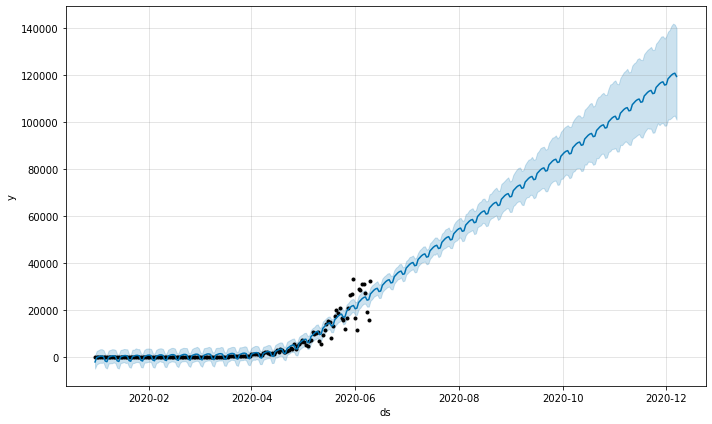

In [13]:
cases_graph = cases_model.plot(forecast_cases)

In [14]:
df_cv = cross_validation(cases_model, horizon=180)
df_cv.head()

INFO:fbprophet:Making 155 forecasts with cutoffs between 2020-01-07 23:59:59.999999820 and 2020-06-09 23:59:59.999999820
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.
INFO:fbprophet:n_changepoints greater than number of observations.Using 6.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.
INFO:fbprophet:n_changepoints greater than number of observations.Using 8.
INFO:fbprophet:n_changepoints greater than number of observations.Using 9.
INFO:fbprophet:n_changepoints greater than number of observations.Using 10.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.
INFO:fbprophet:n_changepoints greater than number of observations.Using 12.
INFO:fbprophet:n_changepoints greater than number of observations.Using 13.
INFO:fbprophet:n_changepoints greater than number

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-01-08,0.0,-1.644767e-09,1.567142e-09,0,2020-01-07 23:59:59.999999820
1,2020-01-09,0.0,-1.474446e-09,1.553780e-09,0,2020-01-08 23:59:59.999999820
2,2020-01-10,0.0,-1.490966e-09,1.464389e-09,0,2020-01-09 23:59:59.999999820
3,2020-01-11,0.0,-1.523709e-09,1.390305e-09,0,2020-01-10 23:59:59.999999820
4,2020-01-12,0.0,-1.356727e-09,1.455374e-09,0,2020-01-11 23:59:59.999999820


In [15]:
df_p = performance_metrics(df_cv)

INFO:fbprophet:Skipping MAPE because y close to 0


INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Skipping MAPE because y close to 0


TypeError: 'NoneType' object is not subscriptable

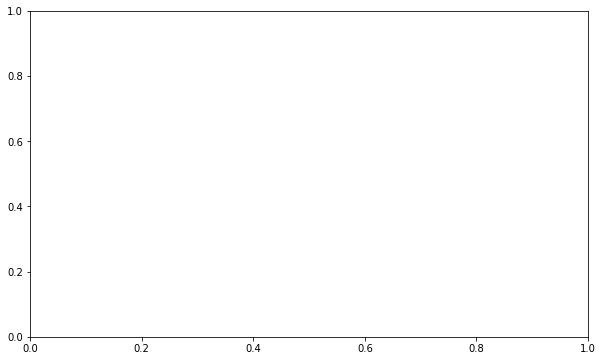

In [16]:
mape = plot_cross_validation_metric(df_cv, metric='mape')

### Deaths

In [17]:
deaths_model = Prophet(daily_seasonality=True)

In [18]:
deaths_model.fit(df_br_deaths)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [19]:
future_deaths = deaths_model.make_future_dataframe(periods=180)

In [20]:
forecast_deaths = deaths_model.predict(future_deaths)
forecast_deaths[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(180)

,ds,yhat,yhat_lower,yhat_upper
163,2020-06-11,1161.302297,1023.793542,1297.263034
164,2020-06-12,1207.370042,1072.362608,1363.388728
165,2020-06-13,1190.319922,1048.820718,1332.650589
166,2020-06-14,1183.249024,1047.159755,1317.801912
167,2020-06-15,1101.049314,959.940598,1238.897525
...,...,...,...,...
338,2020-12-03,4100.932255,3487.931966,4757.042185
339,2020-12-04,4146.999999,3516.994656,4779.445066
340,2020-12-05,4129.949880,3495.174706,4768.372307
341,2020-12-06,4122.878981,3495.100750,4782.981029


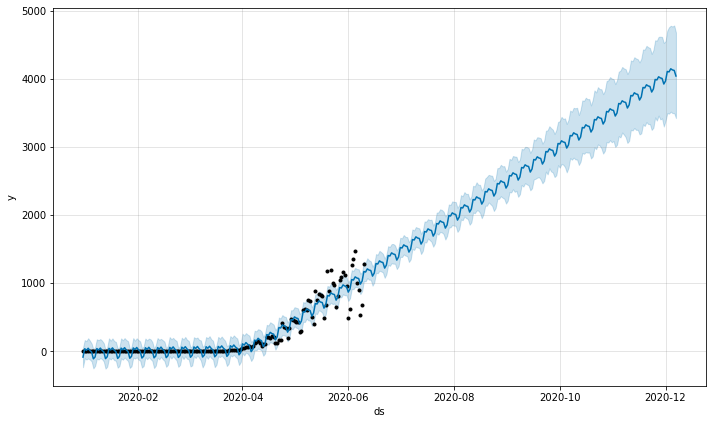

In [21]:
deaths_graph = deaths_model.plot(forecast_deaths)

In [22]:
df_cv = cross_validation(deaths_model, horizon=180)
df_cv.head()

INFO:fbprophet:Making 155 forecasts with cutoffs between 2020-01-07 23:59:59.999999820 and 2020-06-09 23:59:59.999999820
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.
INFO:fbprophet:n_changepoints greater than number of observations.Using 6.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.
INFO:fbprophet:n_changepoints greater than number of observations.Using 8.
INFO:fbprophet:n_changepoints greater than number of observations.Using 9.
INFO:fbprophet:n_changepoints greater than number of observations.Using 10.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.
INFO:fbprophet:n_changepoints greater than number of observations.Using 12.
INFO:fbprophet:n_changepoints greater than number of observations.Using 13.
INFO:fbprophet:n_changepoints greater than number

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-01-08,0.0,-1.573692e-09,1.587422e-09,0,2020-01-07 23:59:59.999999820
1,2020-01-09,0.0,-1.455301e-09,1.556991e-09,0,2020-01-08 23:59:59.999999820
2,2020-01-10,0.0,-1.509191e-09,1.593250e-09,0,2020-01-09 23:59:59.999999820
3,2020-01-11,0.0,-1.369911e-09,1.444841e-09,0,2020-01-10 23:59:59.999999820
4,2020-01-12,0.0,-1.413653e-09,1.538392e-09,0,2020-01-11 23:59:59.999999820


In [23]:
df_p = performance_metrics(df_cv)

INFO:fbprophet:Skipping MAPE because y close to 0


INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Skipping MAPE because y close to 0


TypeError: 'NoneType' object is not subscriptable

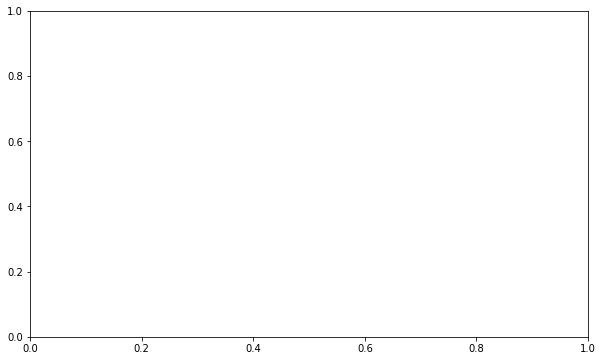

In [24]:
mape = plot_cross_validation_metric(df_cv, metric='mape')